In [1]:
from preamble import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
# 기본 라이브러리들을 import함

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
# 한글 출력시 오류가 나서 이 부분을 추가

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 점수: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(gbrt.score(X_test, y_test)))

# 새롭게 파이썬을 시작했으므로 train_test_split과 load_breast_cancer를 다시 import
# cancer도 마찬가지로 다시 load_breast_cancer()함수를 불러와서 저장
# cancer 데이터에 gradientBoosting방식 적용
# default 값인 learning_rate=0.1, n_estimators=100, max_depth=3이 적용되어 있음
# 이것은 깊이 3인 트리각 100개가 생성됨
# 훈련 세트 점수가 1이므로 과대 적합임
# 테스트 세트 점수가 강의 내용과 다름
# 0.003정도 낮게 나오지만 비슷하게 나옴

훈련 세트 점수: 1.000
테스트 세트 점수: 0.965


In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

cvscores = cross_val_score(gbrt, X, y, cv=10)
print("테스트 세트 정확도 CV=10: {:.3f}\n".format(cvscores.mean()))

cvscores = cross_val_score(gbrt, X, y, cv=5)
print("테스트 세트 정확도 CV=5: {:.3f}\n".format(cvscores.mean()))

# 파이썬을 새로 시작했으므로 cross_val_score 모듈과 make_moons 모듈을 import
# 새로 시작했으므로 X, y에 다시 make_moons()함수를 실행
# 데이터를 조각으로 나눠서 하나를 테스트로하고, 나머지를 훈련으로 하는 교차검증을 실행
# 위의 셀에서 발생한 과대적합을 피하기 위해서 교차검증을 했음
# 과대적합이 없어진 것을 확인할 수 있음

테스트 세트 정확도 CV=10: 0.890

테스트 세트 정확도 CV=5: 0.850



In [5]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 점수: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(gbrt.score(X_test, y_test)))
cvscores = cross_val_score(gbrt, X, y, cv=10)
print("테스트 세트 정확도 CV=10: {:.3f}\n".format(cvscores.mean()))
cvscores = cross_val_score(gbrt, X, y, cv=5)
print("테스트 세트 정확도 CV=5: {:.3f}\n".format(cvscores.mean()))

# max_depth를 변경해서 GradientBoostingClassifier를 다시 적용(다른 조건 동일)
# 트리 최대 깊이를 낮춤
# 과적합을 피하고 테스트데이터의 성능이 향상됨(위와 비교)

훈련 세트 점수: 0.991
테스트 세트 점수: 0.972
테스트 세트 정확도 CV=10: 0.890

테스트 세트 정확도 CV=5: 0.870



In [6]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 점수: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(gbrt.score(X_test, y_test)))
cvscores = cross_val_score(gbrt, X, y, cv=10)
print("테스트 세트 정확도 CV=10: {:.3f}\n".format(cvscores.mean()))
cvscores = cross_val_score(gbrt, X, y, cv=5)
print("테스트 세트 정확도 CV=5: {:.3f}\n".format(cvscores.mean()))

# 이번에는 learning_rate를 변경해서 GradientBoostingClassifier를 다시 적용(다른 조건 동일)
# 이것은 학습률을 낮춤
# max_depth를 변경했을 때보다 테스트데이터의 성능이 낮아짐
# 하지만 과적합을 피하는 방법으로 learning_rate를 변경하는 것도 있음

훈련 세트 점수: 0.988
테스트 세트 점수: 0.965
테스트 세트 정확도 CV=10: 0.870

테스트 세트 정확도 CV=5: 0.860



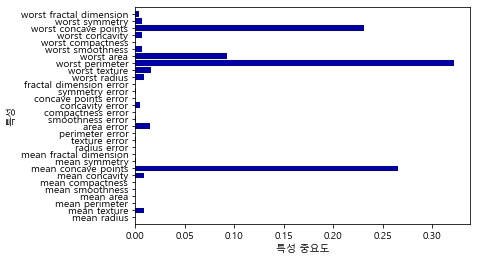

In [7]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
    
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

# 파이썬을 새롭게 시작했으므로 plot_feature_importances_cancer를 다시 정의
# 4주차에서 살펴본 forest는 모든 특성이 중요도가 있었음
# 하지만 여기에서는 일부 특성들이 무시가 됬음
# 강의 내용과 표가 다르게 나오는데, 일부 특성들의 중요도가 높게 되어있음
# 하지만 무시된 특성들이 같음
# 이것은 앞에서 기본 값으로 했을 때 0.003정도의 오차가 발생해서 표가 다르게
# 나온 것이라 추측을 했음

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# 데이터 준비를 위해서 필요한 모듈들을 import
# 보팅클래스에서는 앞에서 배운 랜덤포레스트, 로지스틱회귀, 결정트리를 사용함
# 따라서 필요한 모듈들을 import함

In [9]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
dt_clf = DecisionTreeClassifier(max_depth = 3, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('dt', dt_clf)], 
    voting='hard')
voting_clf.fit(X_train, y_train)

# 랜덤포레스트, 로지스틱회귀, 결정트리를 먼저 생성을 함
# 그 다음에 보팅클래스를 만듦
# 보팅클래스도 훈련을 시켜야 됨
# 결과로는 보팅 클래스가 출력이 됨(estimators를 보여줌)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=42))])

In [10]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, dt_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    
# 보팅클래스에 포함된 모델들도 훈련을 하고 예측을 하고 출력을 함
# 보팅클래스에서도 세 모델들을 통해 예측하고 출력을 함
# 이런 모델들 뿐만 아니라 다른 모델들도 사용 가능
# 이 경우는 voting='hard'의 경우 직접투표임
# 보팅클래스가 강의 내용과는 다르게 출력이 됨

LogisticRegression 0.864
RandomForestClassifier 0.896
DecisionTreeClassifier 0.896
VotingClassifier 0.904


In [11]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('dt', dt_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

for clf in (log_clf, rnd_clf, dt_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

# 이번에는 voting='soft'로 바꿔서 출력 - 간접투표
# 여기서는 출력 값이 hard로 했을 때와 같게 나옴
# 하지만 hard하고 soft는 다른 방법 - 직접, 간접투표
# 확률추정(개별분류기의 예측을 평균내어 확률이 가장 높은 클래스를 예측)을 사용

LogisticRegression 0.864
RandomForestClassifier 0.896
DecisionTreeClassifier 0.896
VotingClassifier 0.904


In [12]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)

print("oob_score:", bag_clf.oob_score_)

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

# oob을 사용(oob_score=True)
# oob 스코어와 우리가 사용하는 예측의 정확도도 출력
# oob를 통해 테스트 결과를 예측해볼 수 있음(같지는 않지만 비슷하다)
# 즉, 데이터가 적을 경우 테스트데이터로 사용 가능함
# 하지만 테스트데이터와는 다름

oob_score: 0.8986666666666666


0.912

In [13]:
import xgboost
xgb_clf = xgboost.XGBClassifier(n_estimators=100, max_depth=3,
    random_state=42, eval_metric='logloss')

xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
accuracy_score(y_test, y_pred)

# XGBoost를 사용 - Gradient Boosting을 최적화(빠른 속도, 확장성, 이식성)
# 출력은 잘 나왔지만 빨간 경고가 발생을 하였다.
# 인터넷을 통해 알아봤지만 왜 이런 경고가 발생을 했는지는 알 수 없었다.

C:\Users\white\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.872

C:\Users\white\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, '특성 1')

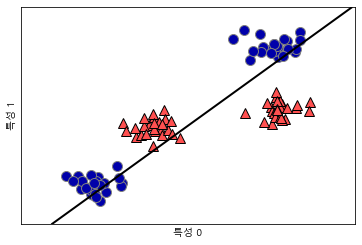

In [14]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# 기존의 X, y로는 강의 내용과 같이 나오지 않아서 make_blob을 통해 X, y 재정의
# 비선형 특성 데이터를 생성
# 하지만 선 하나로는 세모와 동그라미를 나눌 수 없음
# 따라서 특성을 추가해 3차원으로 만들어야함 - 다음 쉘

Text(0.5, 0, '특성1 ** 2')

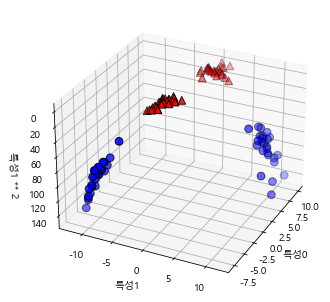

In [15]:
# 두 번째 특성을 제곱하여 추가합니다.
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0인 포인트를 먼저 그리고 그다음 y == 1인 포인트를 그립니다.
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

# 위의 2차원을 3차원으로 보여줌
# 즉, 특성을 3개로 해서 만듦
# 추가한 특성은 특성1을 제곱해서 만듦
# 인터넷을 참조함

C:\Users\white\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0.5, 0, '특성1 ** 2')

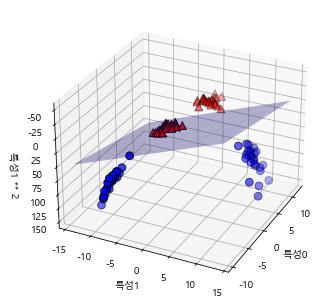

In [16]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

# 위에서 만든 3차원에서 세모와 동그라미를 나누는 경계를 그림
# 인터넷을 참조함

Text(0, 0.5, '특성 1')

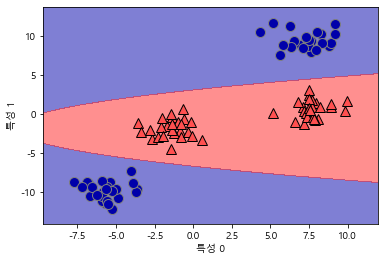

In [17]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], 
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")


# 특성을 추가해서 3차원으로 출력 - 두 번째 특성을 제곱
# 선보다 타원처럼 결정경계가 만들어짐
# ZZ변수를 만들기 위해서 위의 두 쉘을 만듦(인터넷을 참초했음)

In [18]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(svc.score(X_test, y_test)))

# SVC를 이용하기 위해서 SVC를 import했음
# 이번에는 SVC를 이용하여 훈련, 테스터
# 강의에서는 훈련데이터에 과대적합이고, 테스트 세트 정확도가 낮게 나왔지만
# 여기서 실행을 했을 때는 테스트 세트 점수가 0.94로 높게 나오며, 훈련 세트 점수도
# 1이 아닌 0.9정도가 되었다.
# 아마 예전에는 강의 내용처럼 과대적합이었다가 계속 업데이트되면서 과대적합이 아니게
# 되지 않았을까하는 생각을 해본다.

훈련 세트 점수: 0.90
테스트 세트 점수: 0.94


In [19]:
# 훈련 세트에서 특성별 최소값 계산
min_on_training = X_train.min(axis=0)

# 훈련 세트에서 특성별 (최대값 - 최소값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최소값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0 최댓값은 1 
X_train_scaled = (X_train - min_on_training) / range_on_training

# 테스트 세트에도 같은 작업을 적용
# 훈련 세트에서 계산한 최솟값과 범위를 사용
X_test_scaled = (X_test - min_on_training) / range_on_training

In [20]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

# 이번에는 전처리를 해서 SVC를 실행
# 테스트의 정확도가 증가를 했음

# 강의 내용과 다르게 출력이 되었음
# 기본 SVC를 하는 부분에서 강의내용과 다르게 출력이 되었음
# 그래서 이렇게 전처리를 하는 부분에서도 강의 내용과 다르게 출력이 됨
# 하지만 테스트 세트 점수가 증가한 것은 같음

훈련 세트 정확도: 0.984
테스트 세트 정확도: 0.972


In [21]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

# C가 클수록 제약이 완화되고 과대적합이 된다.

# 강의 내용과 다르게 출력이 되었음
# 기본 SVC를 하는 부분에서 강의내용과 다르게 출력이 되었음
# 그래서 이 부분에서도 강의 내용과 다르게 출력이 됨
# 하지만 과대적합이 되는 것은 같음

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.958


In [22]:
from sklearn.datasets import load_iris
iris=load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris['data'], iris['target'], random_state=0)

linear_svm = LinearSVC()
linear_svm.fit(X_train, y_train)

print("linear_svm 훈련 세트 점수: {:.2f}".format(linear_svm.score(X_train, y_train)))
print("linear_svm 테스트 세트 점수: {:.2f}".format(linear_svm.score(X_test, y_test)))

svc = SVC()
svc.fit(X_train, y_train)

print("svc 훈련 세트 점수: {:.2f}".format(svc.score(X_train, y_train)))
print("svc 테스트 세트 점수: {:.2f}".format(svc.score(X_test, y_test)))

# iris를 통해 Linearsvc와 svc를 훈련 및 테스트
# LinearSVC가 SVC보다 훈련 세트 점수가 높지만 테스트 세트 점수는 낮음
# 즉, iris데이터에 대해서 linear_svm이 과대적합인 것을 볼 수 있음
# 인터넷에서 찾아봤지만 경고 메세지는 왜 나왔는지 잘 모르겠음

linear_svm 훈련 세트 점수: 0.98
linear_svm 테스트 세트 점수: 0.92
svc 훈련 세트 점수: 0.96
svc 테스트 세트 점수: 0.97


C:\Users\white\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [23]:
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test, y_test)))

# MPLClassifier를 사용하기 위해 모듈을 import
# 훈련 세트 정확도와 테스트 세트 정확도에 문제가 있음 - 다른 모델에서는 더 높게 나옴
# 강의 내용과 다르게 출력이 되었음
# 아마 알고리즘이 계속 업데이트 되면서 발전해서 정확도가 높게 나온 것으로 생각을 함

훈련 세트 정확도: 0.94
테스트 세트 정확도: 0.92


In [24]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

# 다른 모델들보다 결과가 안좋은 문제를 표준화를 통해 해결 가능
# 훈련 세트의 각 특성의 평균과 각 특성의 표준편차를 계산
# 데이터에서 평균을 빼고 표준 편차로 나누면 평균 0, 표준 편차 1인 데이터로 변환이 됨
# 훈련 세트에서 적용한 것을 테스트 세트에서도 실행
# 그 다음에 MLPClassifier를 통해 훈련 및 정확도 측정
# solver='adam'이라는 기본 값이 적용되어 있는데, adam은 경사하강의 학습률을 조정함
# 빨간 경고가 발생을 함 - 이것은 반복 횟수(max_iter)를 증가시켜야 함 - 다음 쉘

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


C:\Users\white\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

# 반복횟수를 1000번으로 해서 실행
# 결과가 좋아진 것을 볼 수 있음
# 하지만 강의 내용과 달리 훈련 세트 정확도가 과대적합됨
# 아마 모듈이 업데이트된 부분이 있어서 강의 내용과 다른 것이라 추측됨

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [26]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

# 1000번 반복, alpha증가(규제 강화)해서 실행
# 훈련 세트 정확도가 조금 낮아짐
# 여기서는 데이터가 작아서 큰 변화가 없음

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


In [28]:
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

# circle 데이터를 GradientBoostingClassifier 모듈로 훈련 및 테스트하기 위해서
# 필요한 모듈을 import하고, 데이터를 불러옴
# 데이터들을 훈련과 테스트로 나눔
# 그 후에 GradientBoostingClassifier모듈로 훈련
# 인터넷을 참고함

GradientBoostingClassifier(random_state=0)

In [29]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print("결정 함수 결과 형태: {}".format(gbrt.decision_function(X_test).shape))
print("확률 값의 형태: {}".format(gbrt.predict_proba(X_test).shape))

# 얼마나 확실한지 decision_function, predict_proba를 통해 알아볼 수 있음
# 결정함수는 벡터로 나타냄 - 양성 클래스에 속한다고 믿는 정도
# 음수는 다른 클래스에 있는 것을 나타냄
# predict_proba는 두 값을 합치면 1인 확률 값을 나타냄
# 즉, 2차원 배열임
# 앞부분이 크면 결정함수가 음수임 - 뒷부분이 크면 결정함수가 양수
# 결정 함수는 25개의 벡터가 나옴
# 확률 값의 형태는 25개의 벡터에 대한 확률값이 나옴

(100, 2)
(75, 2)
(25, 2)
결정 함수 결과 형태: (25,)
확률 값의 형태: (25, 2)


In [38]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

# 다중클래스의 경우는 어떻게 되는지 보려고 iris 데이터를 사용
# iris 데이터를 불러오고 훈련, 테스트로 나눔
# 그 다음 GradientBoostingClassifier모듈로 훈련(learning_rate=0.01 적용)
# 인터넷을 참고했음

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [39]:
print("결정 함수 결과 형태: {}".format(gbrt.decision_function(X_test).shape))
print("결정 함수 결과:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

print("예측 확률:\n{}".format(gbrt.predict_proba(X_test)[:6]))
print("예측:\n{}".format(gbrt.predict(X_test)))

# 결정함수는 38개에 대해서 각 클래스에 대해서 얼마나 믿는 정도를 보여줌
# 예측은 3개의 클래스 중에서 가장 큰 클래스를 보여줌
# 강의 내용과 다르게 결과가 나타남
# 처음에는 훈련, 테스트 데이터가 잘못된 줄 알았지만, 인터넷에서 본 자료에서는
# 여기 있는 코드로 실행을 했을 때, 강의 내용과 같은 결과가 나옴
# 아마 모듈이 업데이트 되면서 결과가 다르게 된 것이라 생각을 함

결정 함수 결과 형태: (38, 3)
결정 함수 결과:
[[-1.996  0.048 -1.927]
 [ 0.061 -1.908 -1.928]
 [-1.991 -1.876  0.097]
 [-1.996  0.048 -1.927]
 [-1.997 -0.135 -1.203]
 [ 0.061 -1.908 -1.928]]
예측 확률:
[[0.102 0.788 0.109]
 [0.783 0.109 0.107]
 [0.098 0.11  0.792]
 [0.102 0.788 0.109]
 [0.104 0.667 0.229]
 [0.783 0.109 0.107]]
예측:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
